In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('onlinefraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [29]:
df = df.copy()

In [30]:
#converto i valori di type in FLOAT
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [31]:
df.rename(columns={'type': 'Class'}, inplace=True)

Suddivisione in classi


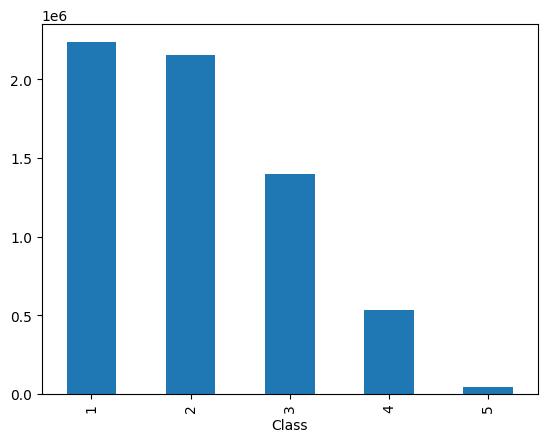

In [32]:
df['Class'].value_counts().plot.bar();

In [33]:
# Rimuovi le colonne "nameDest" e "nameOrig" dal df per poter fare crrelazione
#la correlazione funziona solo con numeri e non stringhe 
new_df = df.drop(["nameDest", "nameOrig"], axis=1)
X = new_df.loc[:, new_df.columns != 'Class']
y = new_df.loc[:, new_df.columns == 'Class']

In [34]:
#Standardizzazione dei dati
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
# li splitto in TRAINING e TESTING 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 700, 
                                                    shuffle = True, 
                                                    stratify = y
                                                    )

In [36]:
# Regressione Logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

SOLVER 
'liblinear': È un buon solver per dataset di piccole e medie dimensioni. Supporta la regolarizzazione L1 e L2 e gestisce anche dataset con molte caratteristiche.

'lbfgs': È un ottimo solver per dataset di dimensioni medio-grandi. Utilizza un algoritmo di ottimizzazione Quasi-Newton con memoria limitata.

'newton-cg': Utilizza il metodo di Newton-Conjugate Gradient. È adatto per dataset di dimensioni medie e piccole.

'sag': Stochastic Average Gradient. È efficiente per dataset di grandi dimensioni. Supporta solo la regolarizzazione L2.

'saga': È simile a 'sag' ma supporta sia la regolarizzazione L1 che L2. È adatto per dataset di grandi dimensioni e supporta la regolarizzazione elastica.

SENZA SMOTE

In [37]:


# prediction for training dataset
train_pred = model.predict(X_train)

# prediction for testing dataset
test_pred = model.predict(X_test)

In [38]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9077507154510024
Accuracy score for Testing Dataset =  0.907558521489575


Matrice di Confusione per verificare 

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_pred)


cm

array([[631414,  25021,   4875,   9939,      1],
       [  7667, 637455,    326,      0,      0],
       [ 12727,  15022, 391249,    781,      6],
       [ 85421,   1814,    422,  72216,      0],
       [  8902,   2956,    569,      2,      1]], dtype=int64)

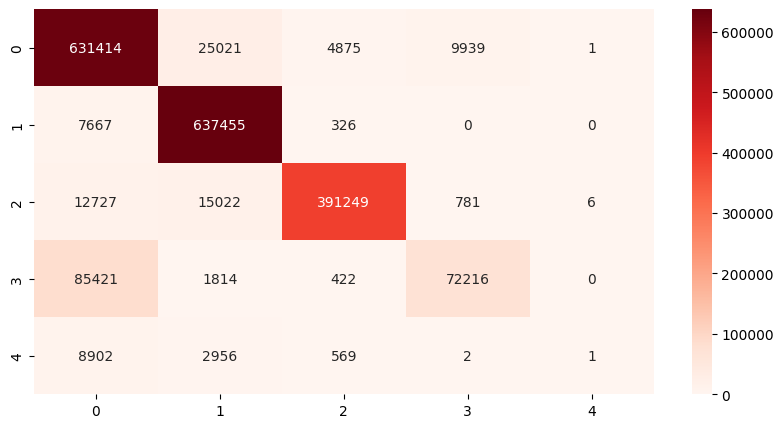

In [40]:
plt.figure(figsize=(10,5))

sns.heatmap(cm, annot=True,fmt=".0f",cmap='Reds');

Nel contesto di fmt=".0f", il formato ".0f" è una stringa di formattazione che specifica che il numero verrà formattato come float senza cifre decimali (0 cifre decimali). Il punto indica che non ci saranno cifre decimali, e la lettera f indica che il numero sarà interpretato come un float.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89    671250
           2       0.93      0.99      0.96    645448
           3       0.98      0.93      0.96    419785
           4       0.87      0.45      0.59    159873
           5       0.12      0.00      0.00     12430

    accuracy                           0.91   1908786
   macro avg       0.75      0.66      0.68   1908786
weighted avg       0.90      0.91      0.90   1908786



# Synthetic Minority Oversampling Technique, or SMOTE

CLASSIFICAZIONE DELLE CLASSI 


In [42]:
from imblearn.over_sampling import SMOTE
model_smote = LogisticRegression(solver = 'lbfgs')
sm = SMOTE(random_state = 667)

In [43]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

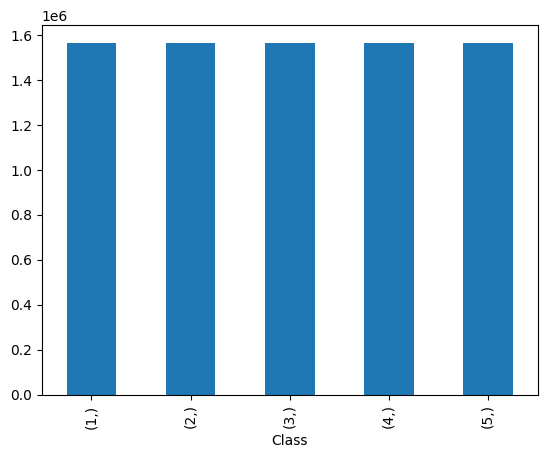

In [44]:
# Bilanciamento delle classi 
y_train_new.value_counts().plot.bar();

In [45]:
# fit il modello
model_smote.fit(X_train_new, y_train_new)

# prediction fo training 
train_pred_sm = model_smote.predict(X_train_new)

# prediction for testing
test_pred_sm = model_smote.predict(X_test)

c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.8472844054269753
Accuracy score for Testing Dataset =  0.8700325756789917


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_new, train_pred_sm)
cm

array([[1198275,   47635,    9086,  230267,   80987],
       [  15057, 1549724,    1469,       0,       0],
       [  12859,   47186, 1471643,    2561,   32001],
       [ 501204,   13858,    2994, 1021320,   26874],
       [  40547,  127873,    3334,     162, 1394334]], dtype=int64)

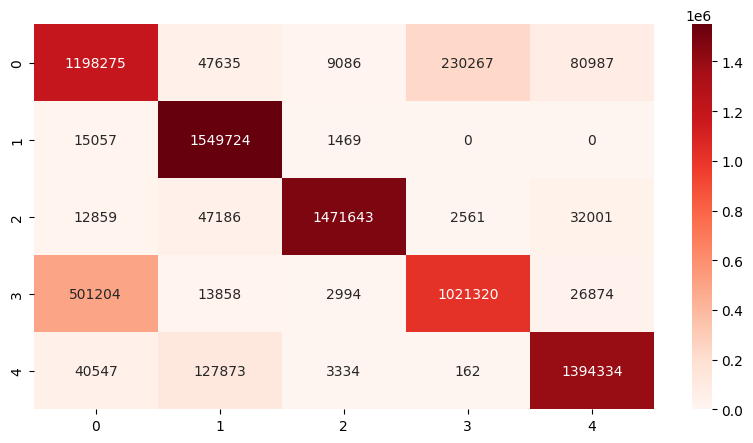

In [48]:
plt.figure(figsize=(10,5))

sns.heatmap(cm, annot=True,fmt=".0f",cmap='Reds');

Risultato vedo che ci sono problemi riguardanti in particolare la classe 0 e 3 